# EDA exercise

- Import data directly using requests (maybe separate functions)
- One notebook with one-day analysis (segmentation, viz etc)
- One notebook with several days and aggregate stats (what is interesting to see over time?)

## The exercise

1. Import one day data
2. Create age segment variable: <18, 18-24, 25-34, 35-44, 45-54, 55-64, 65<.
3. Per age_group, plot impressions (ads displayed) and click-through-rate
4. Define a new cat variable depending on CTR behaviour
5. descr and viz comparisons between demographics and click behaviour
6. Metrics over time: descr stats summarizing click behaviour
7. Now extend over all days, tracking above metrics

## Packages and settings

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)

## Getting the data

In [22]:
base_url = 'http://stat.columbia.edu/~rachel/datasets/'
filename = 'nyt1.csv'

nyt_data = pd.read_csv(base_url+filename)
all_users = nyt_data.copy()

all_users.head(10)

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
5,47,0,11,1,1
6,0,0,7,1,0
7,46,0,5,0,1
8,16,0,3,0,1
9,52,0,4,0,1


## What's in the dataset?

In [23]:
all_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Age          458441 non-null  int64
 1   Gender       458441 non-null  int64
 2   Impressions  458441 non-null  int64
 3   Clicks       458441 non-null  int64
 4   Signed_In    458441 non-null  int64
dtypes: int64(5)
memory usage: 17.5 MB


In [24]:
all_users.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


From the descriptive statistics above, we note that Gender and Signed_In seems to be 'categories' in binary format. We also see that no user saw more than 20 ads ('Impressions'), and no user clicked on more than 4 of the ads displayed. 

Now scroll up and look at row 6 in the all_users dataframe. For this user, Age, Gender and Signed_In are all 0. Could this be a pattern in the data?

In [25]:
all_users.groupby(["Signed_In", "Gender", "Age"]).mean()

Impressions   Clicks
Signed_In Gender Age                      
0         0      0       4.999657  0.14208
1         0      7       5.000000  0.75000
                 8       6.333333  0.00000
                 9       5.687500  0.12500
                 10      5.218750  0.12500
...                           ...      ...
          1      101     4.500000  0.00000
                 102     4.500000  0.00000
                 103     3.000000  0.00000
                 104     6.000000  1.00000
                 107     4.500000  0.50000

[197 rows x 2 columns]

Evidently, all users that are *not* signed in also have their age and gender features set to 0, whereas the signed-in users have both age and gender specified. Now, do we have a group of newborns of the same gender clicking around on the NYT site?! Of course not, so we can safely assume that age and gender of these users are simply unknown. 

With some further information from the book, we now know that our features mean the following:

 - **Age** *int*: user's age as integer, *signed-in users only*
 - **Gender** *cat/int*: female=0, male=1, *signed-in users only*
 - **Impressions** *int*: number of ads displayed to user
 - **Clicks** *int*: number of clicked ads by user
 - **Signed_In** *cat/int*: 0=no, 1=yes

The plot below shows the proportions between signed-in and non-signed-in users.

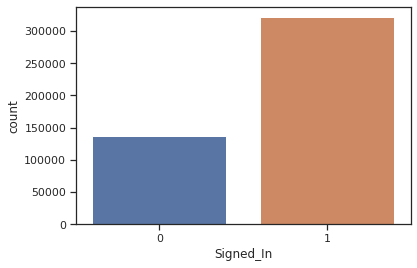

In [50]:
sns.countplot(x="Signed_In", data=all_users, tick_label=['Not signed-in', 'Signed-in'])
plt.show()

## Click behaviour by age group

The first user segmentation we will look at is by age group, so let's create a new categorical feature for this.  The age groups are given by the variable age_cat_labels below.

In [41]:
lower_incl_range = [0, 18, 25, 35, 45, 55, 65, 200]
age_cat_labels=['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65<']

all_users["Age_Group"] = pd.cut(
    nyt_data["Age"], 
    lower_incl_range,
    right=False,
    labels=age_cat_labels,
)

#check that categories are created as expected
all_users.head(10)


,Age,Gender,Impressions,Clicks,Signed_In,Age_Group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65<
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
5,47,0,11,1,1,45-54
6,0,0,7,1,0,<18
7,46,0,5,0,1,45-54
8,16,0,3,0,1,<18
9,52,0,4,0,1,45-54


Since we are interested in the users' click behaviour, it could be interesting to know the number of clicks per displayed ad. We call this /click-through-rate/ or CTR for short. Let's add this as a feature to the dataset.

In [42]:
all_users['CTR'] = all_users['Clicks'] / all_users['Impressions']
all_users.head()

,Age,Gender,Impressions,Clicks,Signed_In,Age_Group,CTR
0,36,0,3,0,1,35-44,0.0
1,73,1,3,0,1,65<,0.0
2,30,0,3,0,1,25-34,0.0
3,49,1,3,0,1,45-54,0.0
4,47,1,11,0,1,45-54,0.0


Since we noted earlier that only signed-in users have known age, we have to restrict our analysis to those users. 

In [116]:
signed_in_users = all_users[all_users['Signed_In'] == 1].drop("Signed_In", axis='columns')
signed_in_users.head()

,Age,Gender,Impressions,Clicks,Age_Group,CTR,CTR_Group
0,36,0,3,0,35-44,0.0,NaN
1,73,1,3,0,65<,0.0,NaN
2,30,0,3,0,25-34,0.0,NaN
3,49,1,3,0,45-54,0.0,NaN
4,47,1,11,0,45-54,0.0,NaN


Furthermore, if a user hasn't been shown any ads ("Impressions"==0) they are of little use for our analysis, so let's remove those too.

In [61]:
signed_in_seen_ad = signed_in_users[signed_in_users["Impressions"] > 0]


Now we are ready to have a look at how users are distributed over the age groups specified:

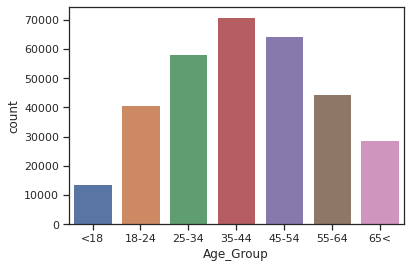

In [66]:
sns.countplot(x='Age_Group', data=signed_in_users)
plt.show()

Before we look at the actual click bahaviour, let's first examine how ads are showns to users of various age groups. By looking at the plot below, it is clear that there aren't huge differences in the number of impressions for users of different ages, and the age groups with the most users also have more outliers upward.

Looking at the next plot below, it is clear that an overwelming majority of users don't click on any ads. These users also cloud the view of what is going on with the users who actually click ads.

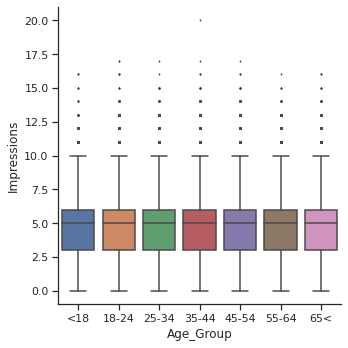

In [98]:
sns.catplot(x="Age_Group", y="Impressions", kind="box", data=signed_in_users, fliersize=1)
plt.show()

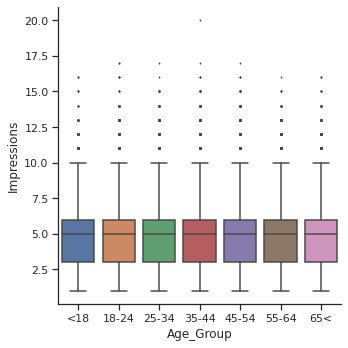

In [97]:
# Fix ticks so that it is shown that this starts from 1 instead of 0
sns.catplot(x="Age_Group", y="Impressions", kind="box", data=signed_in_seen_ad, fliersize=1)
plt.show()

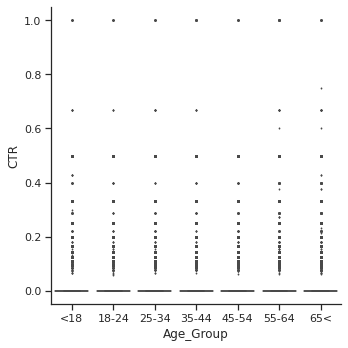

In [96]:
sns.catplot(x="Age_Group", y="CTR", kind="box", data=signed_in_seen_ad, fliersize=1)
plt.show()

So even though we removed users that had not seen any ads, the CTR distribution is still heavily centered around 0. What do we get if we look at users that have nonzero clicks instead (assuming that they can't click unless they are first shown an ad).

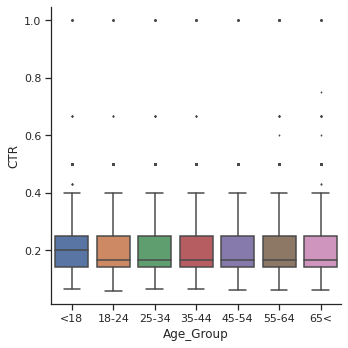

In [89]:
signed_in_nonzero_clicks = signed_in_users[(signed_in_users['Clicks'] > 0)]
sns.catplot(x="Age_Group", y="CTR", kind="box", data=signed_in_nonzero_clicks, fliersize=1)
plt.show()

To get even clearer differentiation, we can try to remove the outliers where CTR=1. The basis for this assumption is that there is a clear gap between these and the rest of the distributions and that a click-through-rate of 1 indicates that the user clicked on every single ad shown. Assuming that most people visit NYT are looking for news articles and not ads, it makes sense to remove these users as well. They could be bots or similar.

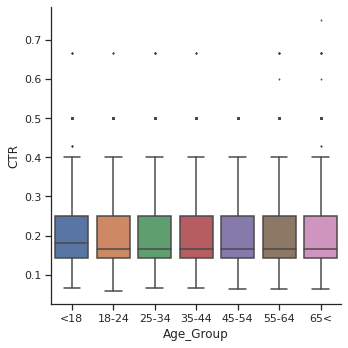

In [95]:
signed_in_noninteger_CTR = signed_in_nonzero_clicks[(signed_in_nonzero_clicks['CTR'] < 1)]
sns.catplot(x="Age_Group", y="CTR", kind="box", data=signed_in_noninteger_CTR, fliersize=1)
plt.show()

So only the edge-groups, under 18 and above 65 years of age, might have an ever so slightly increased CTR. Other than that, age doesn't seem to be a good way of segmenting click-behaviour.

## Click behaviour by gender

So we have seen that age isn't very interesting for differentiating click behaviour in NYT users. How about gender?

Let's first take a look at the distribution of gender. Once again we leave out users with CTR equal to 0 or 1.

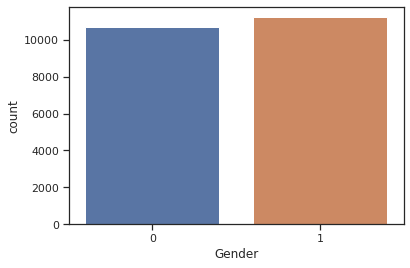

In [100]:
sns.countplot(x="Gender", data=signed_in_noninteger_CTR)
plt.show()

Recalling that 0 means female and 1 means male, there are slightly more male than female users but overall it is quite even. Are there any difference in the number of ads displayed to the respective genders?

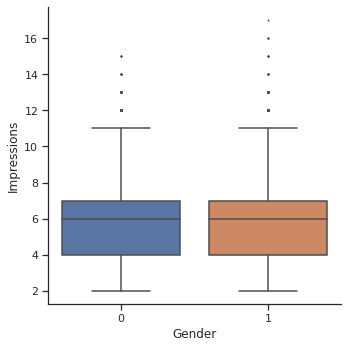

In [104]:
# Fix ticks so that it is shown that this starts from 1 instead of 0
sns.catplot(x="Gender", y="Impressions", kind="box", data=signed_in_noninteger_CTR, fliersize=1)
plt.show()

Clearly there are no real difference in the number of ads shown. So is the click behaviour any different?

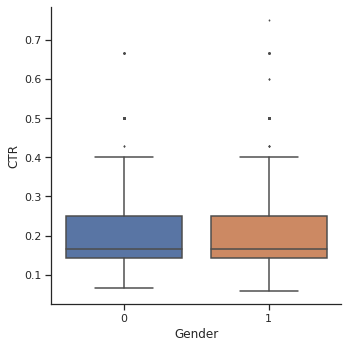

In [105]:
# Fix ticks so that it is shown that this starts from 1 instead of 0
sns.catplot(x="Gender", y="CTR", kind="box", data=signed_in_noninteger_CTR, fliersize=1)
plt.show()

Except some more upward outliers for the males, there are no clear difference between the genders' respective click behaviour.


## Looking at it from the opposite side

As we have seen, users of different age or gender exhibit very similar click behaviour. So let's look at the other side of the coin: can we see differences in age or gender or other if we segment all users based on their click-behaviour only?

To do this, we define a new categorical feature: CTR_Group. Since there are an overwhelming amount of users that have CTR=0, these are left out of the binning and thus their CTR_Group is NaN.

In [113]:
lower_incl_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
CTR_cat_labels=['(0,0.1]', '(0.1, 0.2]', '(0.2, 0.3]', '(0.3, 0.4]', '(0.4, 0.5]', '(0.5, 1]']

all_users["CTR_Group"] = pd.cut(
    all_users["CTR"], 
    lower_incl_range,
    right=True,
    labels=CTR_cat_labels,
)

#check that categories are created as expected
all_users.head(10)

,Age,Gender,Impressions,Clicks,Signed_In,Age_Group,CTR,CTR_Group
0,36,0,3,0,1,35-44,0.000000,NaN
1,73,1,3,0,1,65<,0.000000,NaN
2,30,0,3,0,1,25-34,0.000000,NaN
3,49,1,3,0,1,45-54,0.000000,NaN
4,47,1,11,0,1,45-54,0.000000,NaN
5,47,0,11,1,1,45-54,0.090909,"(0,0.1]"
6,0,0,7,1,0,<18,0.142857,"(0.1, 0.2]"
7,46,0,5,0,1,45-54,0.000000,NaN
8,16,0,3,0,1,<18,0.000000,NaN
9,52,0,4,0,1,45-54,0.000000,NaN


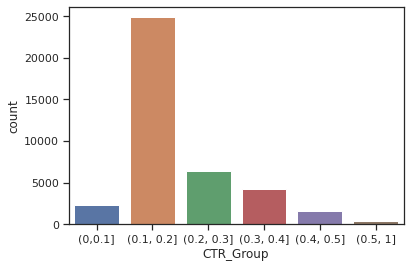

In [123]:
sns.countplot(x='CTR_Group', data=all_users)
plt.show()

Interestingly, the majority of users who clicked ads clicked on 1-2 out of 10 ads shown. Some users click on fewer  and even more click on 2 or more (makes sense??). For the users that aren't signed in we lack information to characterize them further but we could have a look at the signed in users to determine if the click segments have differnet age and gender characteristics.

In [115]:
signed_in_users.head()

,Age,Gender,Impressions,Clicks,Age_Group,CTR
0,36,0,3,0,35-44,0.0
1,73,1,3,0,65<,0.0
2,30,0,3,0,25-34,0.0
3,49,1,3,0,45-54,0.0
4,47,1,11,0,45-54,0.0


In [117]:
signed_in_users = all_users[all_users['Signed_In'] == 1].drop("Signed_In", axis='columns')
signed_in_users.head()

,Age,Gender,Impressions,Clicks,Age_Group,CTR,CTR_Group
0,36,0,3,0,35-44,0.0,NaN
1,73,1,3,0,65<,0.0,NaN
2,30,0,3,0,25-34,0.0,NaN
3,49,1,3,0,45-54,0.0,NaN
4,47,1,11,0,45-54,0.0,NaN


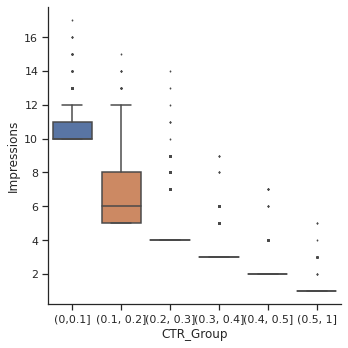

In [119]:
sns.catplot(x="CTR_Group", y="Impressions", kind="box", data=signed_in_users, fliersize=1)
plt.show()

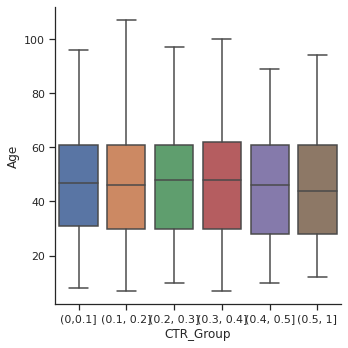

In [120]:
sns.catplot(x="CTR_Group", y="Age", kind="box", data=signed_in_users, fliersize=1)
plt.show()

Clearly there is more variability in age when users are segmented based on CTR. Comparing the countplots of Age_group and CTR_Group makes it clear that the former segmentation includes more users than the latter and thus the variability seen in the above plot is due to a smaller sample size.

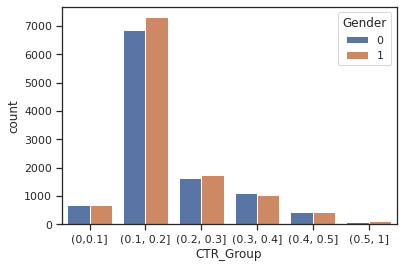

In [124]:
sns.countplot(x='CTR_Group', hue='Gender', data=signed_in_users)
plt.show()